In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import zscore
#Importing the necessary libraries

In [2]:
df = pd.read_csv(r"C:\Users\PRUDHVI\Downloads\archive (2)\deepseek.csv")
#Reading the file

In [3]:
df.info()
#Here, I noticed that the columns 'createdAt', 'pseudo_conversationId', 'pseudo_author_id ' needs dtype conversion.
#The column 'author_location' has null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364295 entries, 0 to 364294
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   pseudo_id               364295 non-null  uint64
 1   text                    364295 non-null  object
 2   retweetCount            364295 non-null  int64 
 3   replyCount              364295 non-null  int64 
 4   likeCount               364295 non-null  int64 
 5   quoteCount              364295 non-null  int64 
 6   viewCount               364295 non-null  int64 
 7   bookmarkCount           364295 non-null  int64 
 8   createdAt               364295 non-null  object
 9   lang                    364295 non-null  object
 10  isReply                 364295 non-null  bool  
 11  pseudo_inReplyToId      364295 non-null  object
 12  pseudo_conversationId   364295 non-null  uint64
 13  pseudo_inReplyToUserId  364295 non-null  object
 14  pseudo_author_id        364295 non-n

DataSet Overview:
This DataSet is taken from Kaggle with 19 columns and 364295 rows.
The data comprises of tweets from the social media platform 'X' along with relavant engagement metrics.
Lets move on to the data cleaning process and then the analysis part.

In [4]:
df.head()
#Here, I noticed that the columns 'pseudo_inReplyToId' and 'pseudo_inReplyToUserId' have '<NA>' as values and should be considered missing.

,pseudo_id,text,retweetCount,replyCount,likeCount,quoteCount,viewCount,bookmarkCount,createdAt,lang,isReply,pseudo_inReplyToId,pseudo_conversationId,pseudo_inReplyToUserId,pseudo_author_id,author_location,author_followers,author_following,author_isVerified,author_isBlueVerified
0,3029354584600937484,@rovercrc 🚀 Exciting update\n@OfficialNAIeth \...,3,0,4,0,13,1,2025-01-29 07:52:36+00:00,en,True,403264573826447175,403264573826447175,5727306175492586564,447383909022719940,NaN,231,94,False,False
1,9559423350203512242,HPE、KVMベースのサーバー仮想化ソフト「HPE VM Essentials」をCPUあた...,0,0,0,0,30,0,2025-01-29 07:49:25+00:00,ja,False,<NA>,9559423350203512242,<NA>,9472823016288015310,"Tokyo, Japan",788,404,False,False
2,6652523114357959948,#Nvidia втрачає $600 мільярдів у зв'язку з тим...,0,0,0,0,22,0,2025-01-29 07:33:15+00:00,uk,False,<NA>,6652523114357959948,<NA>,8626816506644117194,Київ,33,28,False,False
3,4580738097868415576,HPE、VMware代替基盤とAI基盤を2月に国内発売--日本に最適化\nhttps://t...,0,0,0,0,56,0,2025-01-29 07:32:38+00:00,ja,False,<NA>,4580738097868415576,<NA>,9472823016288015310,"Tokyo, Japan",788,404,False,False
4,4794552721709132793,AMD Ryzen 7 : 9800X3D CPU / Processor 🏷️ £499....,3,0,4,0,342,0,2025-01-29 07:31:21+00:00,en,False,<NA>,4794552721709132793,<NA>,5141337927170768100,UK,1378,85,False,False


In [5]:
df.drop(['author_isVerified', 'pseudo_conversationId', 'pseudo_inReplyToId', 'pseudo_inReplyToUserId'], axis=1, inplace=True)

In [6]:
df.rename(columns=str.lower, inplace = True)
#changing the column names to lower case

In [7]:
df.columns
#verifying of the column names changed to lowercase or not

Index(['pseudo_id', 'text', 'retweetcount', 'replycount', 'likecount',
       'quotecount', 'viewcount', 'bookmarkcount', 'createdat', 'lang',
       'isreply', 'pseudo_author_id', 'author_location', 'author_followers',
       'author_following', 'author_isblueverified'],
      dtype='object')

In [8]:
df['createdat']=pd.to_datetime(df['createdat'])
df['pseudo_author_id'] =df['pseudo_author_id'].astype(object)
# #changing the dtype of the columns

In [9]:
df.info()
#verifying the above step

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364295 entries, 0 to 364294
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   pseudo_id              364295 non-null  uint64             
 1   text                   364295 non-null  object             
 2   retweetcount           364295 non-null  int64              
 3   replycount             364295 non-null  int64              
 4   likecount              364295 non-null  int64              
 5   quotecount             364295 non-null  int64              
 6   viewcount              364295 non-null  int64              
 7   bookmarkcount          364295 non-null  int64              
 8   createdat              364295 non-null  datetime64[ns, UTC]
 9   lang                   364295 non-null  object             
 10  isreply                364295 non-null  bool               
 11  pseudo_author_id       364295 non-null 

In [10]:
df['lang'].unique()

array(['en', 'ja', 'uk', 'nl', 'hi', 'it', 'es', 'in', 'de', 'tr', 'ca',
       'zh', 'fr', 'ko', 'qam', 'th', 'und', 'gu', 'lt', 'ru', 'fa', 'ro',
       'cs', 'ar', 'pt', 'qme', 'tl', 'mr', 'fi', 'et', 'ur', 'hu', 'pl',
       'ta', 'sv', 'te', 'qht', 'ml', 'bn', 'ht', 'el', 'cy', 'vi', 'ne',
       'kn', 'lv', 'bg', 'eu', 'sl', 'no', 'iw', 'da', 'si', 'is', 'ps',
       'my', 'pa', 'qct', 'ckb', 'sr', 'am', 'hy', 'or', 'sd', 'qst',
       'lo', 'ka', 'dv', 'zxx'], dtype=object)

In [11]:
df.isna().sum()
#checking for total num of missing values

pseudo_id                     0
text                          0
retweetcount                  0
replycount                    0
likecount                     0
quotecount                    0
viewcount                     0
bookmarkcount                 0
createdat                     0
lang                          0
isreply                       0
pseudo_author_id              0
author_location          144962
author_followers              0
author_following              0
author_isblueverified         0
dtype: int64

In [12]:
count = (df == '<NA>').sum()
print(count)
#verifying the presence of '<NA>' value in other columns.

pseudo_id                0
text                     0
retweetcount             0
replycount               0
likecount                0
quotecount               0
viewcount                0
bookmarkcount            0
createdat                0
lang                     0
isreply                  0
pseudo_author_id         0
author_location          0
author_followers         0
author_following         0
author_isblueverified    0
dtype: int64


In [13]:
#defining the function
def fill_with_mode(series):
    mode = series.mode()
    return series.fillna(mode[0] if not mode.empty else "Unknown")

#calling the function
df['author_location'] = df.groupby('lang')['author_location'].transform(fill_with_mode)
#filling the missing values in "author_location" column based on the most common (mode) location within each language group.

In [14]:
df.isnull().sum()
#verifying the presence of null values

pseudo_id                0
text                     0
retweetcount             0
replycount               0
likecount                0
quotecount               0
viewcount                0
bookmarkcount            0
createdat                0
lang                     0
isreply                  0
pseudo_author_id         0
author_location          0
author_followers         0
author_following         0
author_isblueverified    0
dtype: int64

In [15]:
duplicates = df.duplicated().sum()
print(duplicates)
#checking for duplicates

0


In [16]:
deepseek_keywords = ['deepseek', 'deep seek', 'deep-seek', 'deepseek technology', 'deepseek ai', '@deepseek', 'ai','@ai', 
                     'claude', 'claude vs deepseek', 'chat gpt vs deepseek', 'chat gpt']

In [17]:
df['text_lower'] = df['text'].str.lower()
df['is_deepseek_related'] = df['text_lower'].str.contains('|'.join(deepseek_keywords), na=False)
deepseek_tweets = df[df['is_deepseek_related']]
print(f"Number of Deepseek-related tweets: {len(deepseek_tweets)}")

Number of Deepseek-related tweets: 230419


In [18]:
df = df[df['is_deepseek_related']]
df.shape

(230419, 18)

From our dataframe, we cleaned a huge amout of data by filtering out tweets that were not related to deepseek using some relavant keywords.

In [19]:
engagement_columns = ['retweetcount', 'replycount', 'likecount', 'quotecount', 'viewcount', 'bookmarkcount']

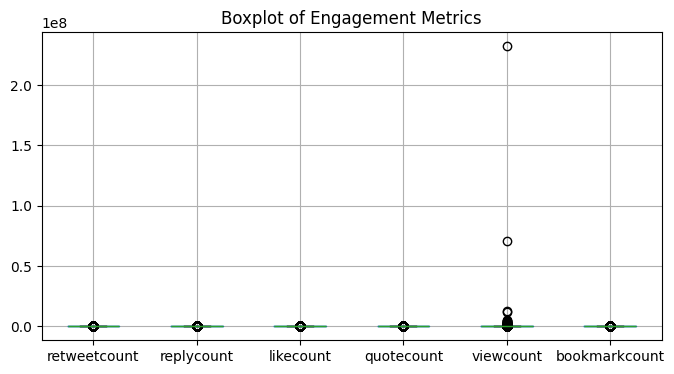

In [20]:
plt.figure(figsize=(8, 4))
df.boxplot(column=engagement_columns)
plt.title("Boxplot of Engagement Metrics")
plt.show()
#checking for outliers via boxplot in engagement columns and found that there are many outliers

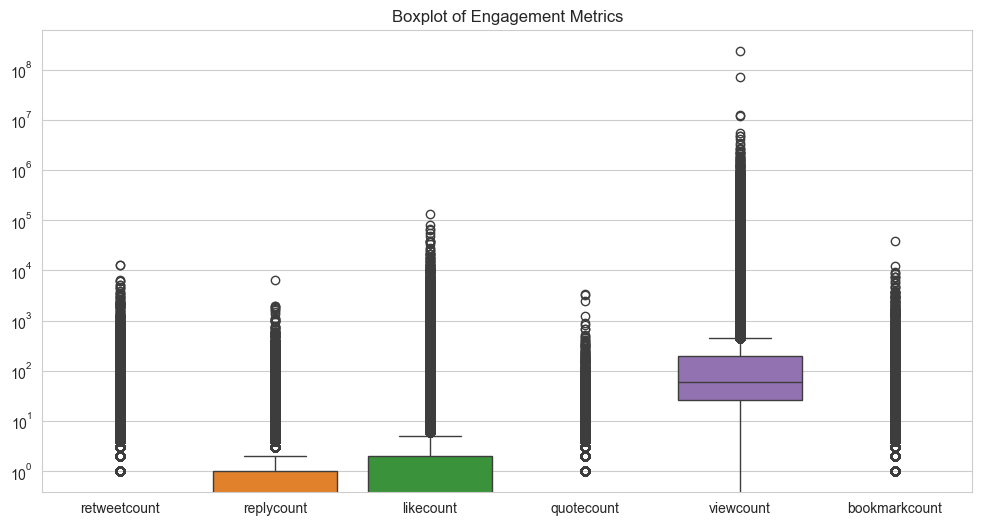

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[engagement_columns])
plt.yscale("log")
plt.title("Boxplot of Engagement Metrics")
plt.show()

#checking for outliers via boxplot in engagement columns and found that there are many outliers

In [22]:
percentiles = [0.01, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
percentile_values = df[engagement_columns].quantile(percentiles)
print(percentile_values)

      retweetcount  replycount  likecount  quotecount  viewcount  \
0.01           0.0         0.0        0.0         0.0       3.00   
0.10           0.0         0.0        0.0         0.0      13.00   
0.20           0.0         0.0        0.0         0.0      21.00   
0.30           0.0         0.0        0.0         0.0      31.00   
0.40           0.0         0.0        0.0         0.0      44.00   
0.50           0.0         0.0        0.0         0.0      61.00   
0.60           0.0         0.0        1.0         0.0      90.00   
0.70           0.0         1.0        1.0         0.0     144.00   
0.80           0.0         1.0        2.0         0.0     281.00   
0.90           1.0         2.0        7.0         0.0     863.00   
0.95           3.0         4.0       21.0         0.0    2492.10   
0.99          30.0        19.0      196.0         3.0   22911.56   

      bookmarkcount  
0.01            0.0  
0.10            0.0  
0.20            0.0  
0.30            0.0  
0.40 

General Observations:
- Extreme outliers exist and the data is skewed
- Except for the view count (58 views), there is no engagement for up to 50th percentile of the posts which is suggested by the 50th percentile being 0 for all columns.
- View count is the most common engagement metric
- Bookmarking is very rare
- The top 1% of posts were mostly engaged, probably because of the authors being mostly influential or having more followers or the polarity of the  tweets being high.

In [23]:
viral_thresholds = df[engagement_columns].quantile(0.99)
viral_tweets = df[(df[engagement_columns] > viral_thresholds).any(axis=1)]
df['is_viral'] = df.index.isin(viral_tweets.index)
print(f"Total viral tweets detected: {len(viral_tweets)}")
#Identifying Viral Tweets (Above 99th Percentile)

Total viral tweets detected: 4632


In [24]:
z_scores = np.abs(zscore(df[engagement_columns]))
anomalies = df[(z_scores > 3).any(axis=1)]
print(f"Total anomalies detected: {len(anomalies)}")
# Anomaly Detection Using Z-score

Total anomalies detected: 927


Chosen Method: Z-Score test for anomaly detection.  
Rejected Methods: IQR, Winsorisation, and others.  
Reason for Choice:
- Engagement is likely to occur only with viral tweets.  
- Other methods might incorrectly classify viral tweets as outliers.  
- This could negatively impact the analysis.

In [25]:
#Adding anomaly flag
df["is_anomaly"] = (z_scores > 3).any(axis=1)

#Understanding anomaly distribution
print(df.groupby("is_anomaly")[["author_followers", "retweetcount", "likecount"]].mean())
#Viral tweets may have high follower counts and organic reach, while spam-like tweets could have low followers but extreme engagement.

            author_followers  retweetcount    likecount
is_anomaly                                             
False           41854.449597      0.859834     6.392118
True           722821.697950    402.937433  2919.892125


Distinguishing Bots from Incorrect Data:
- Now, we separate bots from incorrect data within the anomalies.

Criteria for Bots:
- Low follower count but high engagement.
- Frequent posting in short intervals.
- Unusual content repetition.
    
Criteria for Incorrect Data:
- Engagement metrics don’t align with user properties.
- Impossible values (e.g., 1M retweets but only 5 followers).

In [26]:
df["tweet_hour"] = df["createdat"].dt.hour
tweet_freq_day = df.groupby("pseudo_author_id")["tweet_hour"].count().reset_index(name="tweets_per_day")
suspicious_users = tweet_freq_day[tweet_freq_day["tweets_per_day"] > 343]["pseudo_author_id"].values.tolist()
df["is_bot"] = (df["is_anomaly"] & (df["author_followers"] < 50) & (df["retweetcount"] > 1000) | (df["pseudo_author_id"].isin(suspicious_users)))
df["is_incorrect"] = df["is_anomaly"] & ((df["likecount"] > 1_000_000) & (df["author_followers"] < 10))
print(f"Potential Bots Detected: {df['is_bot'].sum()}")
print(f"Incorrect Data Entries: {df['is_incorrect'].sum()}")

Potential Bots Detected: 344
Incorrect Data Entries: 0


Now that we've marked the anomolies, potential bots, incorrect data, viral tweets.
Let us confirm the the bots/promoters and check their activity if seemed to be true.
General assumptions:
Bots posts frequently, but not interact much
Bots posts on evenly distributed time intervals or a set pattern as they are automated
Bots generally post links either promoting or pushing some content
Bots must be from same location or post same content ie, duplicates.

In [27]:
print(tweet_freq_day.tail())

           pseudo_author_id  tweets_per_day
143230  9999573479121965328               1
143231  9999639652970670853               1
143232  9999675158145230290               1
143233  9999786076501947228               1
143234  9999786542438930520               1


In [28]:
df = df.merge(tweet_freq_day, on="pseudo_author_id", how="left")
print(df.tail(2))

                  pseudo_id  \
230417  3997066265609380709   
230418  4548086756445171347   

                                                     text  retweetcount  \
230417  Tired of sky-high retail prices? Say hello to ...           915   
230418  This is one of the best new AI tools for resea...          3916   

        replycount  likecount  quotecount  viewcount  bookmarkcount  \
230417         659       7087          43   70994679           1471   
230418           0      24594         254  232328866          12542   

                       createdat lang  ...  author_following  \
230417 2024-04-09 22:04:00+00:00   en  ...                61   
230418 2024-02-21 04:16:03+00:00   en  ...                 0   

       author_isblueverified  \
230417                  True   
230418                  True   

                                               text_lower  \
230417  tired of sky-high retail prices? say hello to ...   
230418  this is one of the best new ai tools for resea

In [29]:
bots_df = df[df["is_bot"]]
bots_df.head(10)
# Display key stats
print(bots_df[["pseudo_author_id", "author_followers", "tweets_per_day", "retweetcount", "likecount"]].head(10))

           pseudo_author_id  author_followers  tweets_per_day  retweetcount  \
222372  4432874130505894775                17             344             0   
222373  4432874130505894775                17             344             0   
222377  4432874130505894775                17             344             0   
222378  4432874130505894775                17             344             0   
222379  4432874130505894775                17             344             0   
222381  4432874130505894775                17             344             0   
222382  4432874130505894775                17             344             0   
222383  4432874130505894775                17             344             0   
222384  4432874130505894775                17             344             0   
222385  4432874130505894775                17             344             0   

        likecount  
222372          0  
222373          0  
222377          0  
222378          0  
222379          0  
222381    

In [30]:
bots_df.shape

(344, 24)

In [31]:
bots_df['pseudo_author_id'].duplicated().sum()

np.int64(343)

In [32]:
bots_df['text'].duplicated().sum()

np.int64(0)

In [33]:
# Check engagement metrics for bots
print("\nAverage Engagement Metrics for Bots:")
print(bots_df[engagement_columns].mean())


Average Engagement Metrics for Bots:
retweetcount     0.000000
replycount       0.959302
likecount        0.061047
quotecount       0.000000
viewcount        9.552326
bookmarkcount    0.000000
dtype: float64


In [34]:
bots_df["contains_link"] = bots_df["text"].str.contains("http", regex=True, na=False)

# Percentage of bot tweets containing links
link_percentage = bots_df["contains_link"].mean() * 100
print(f"Percentage of Bot Tweets Containing Links: {link_percentage:.2f}%")

Percentage of Bot Tweets Containing Links: 30.81%


C:\Users\PRUDHVI\AppData\Local\Temp\ipykernel_11048\1107831797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bots_df["contains_link"] = bots_df["text"].str.contains("http", regex=True, na=False)


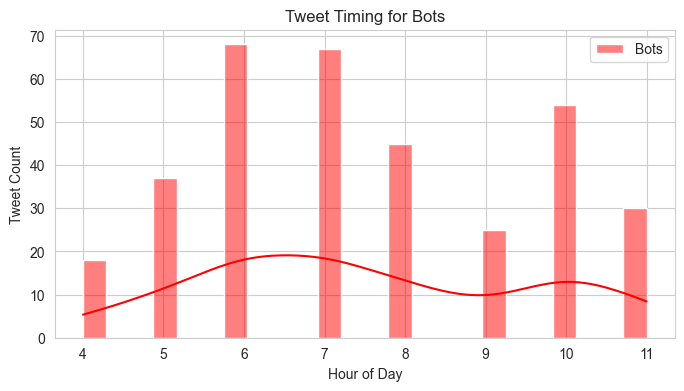

In [35]:
plt.figure(figsize=(8, 4))
sns.histplot(bots_df["tweet_hour"], bins=24, kde=True, color="red", label="Bots")
plt.xlabel("Hour of Day")
plt.ylabel("Tweet Count")
plt.title("Tweet Timing for Bots")
plt.legend()
plt.show()

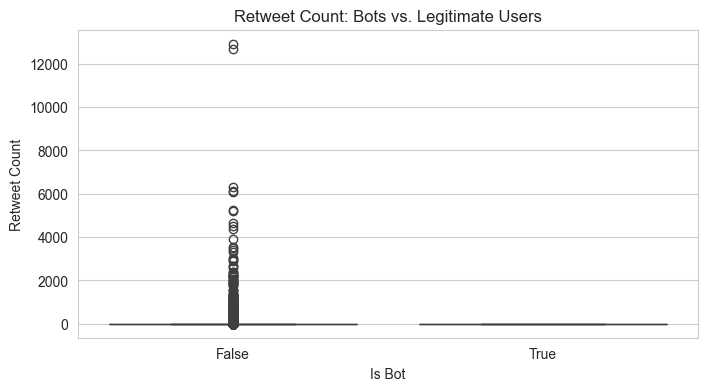

In [36]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="is_bot", y="retweetcount")
plt.title("Retweet Count: Bots vs. Legitimate Users")
plt.xlabel("Is Bot")
plt.ylabel("Retweet Count")
plt.show()

In [37]:
# Find top 1% most engaged tweets
viral_threshold = df["retweetcount"].quantile(0.99)
viral_tweets = df[df["retweetcount"] > viral_threshold]

# Check percentage of viral tweets posted by bots
bot_viral_tweets = viral_tweets[viral_tweets["is_bot"]].shape[0]
total_viral_tweets = viral_tweets.shape[0]
bot_viral_percentage = (bot_viral_tweets / total_viral_tweets) * 100

print(f"Percentage of Viral Tweets from Bots: {bot_viral_percentage:.2f}%")
# Expected Insight:

# If bots contribute heavily to viral tweets, they may be manipulating trends.
# If bots rarely go viral, they may just be low-impact automated accounts.

Percentage of Viral Tweets from Bots: 0.00%


Inferences from Results:  
- Potential Bot Tweets:  
    - Belong to a single user.  
    - Contain URLs.  
    - Show no engagement (likes, replies, etc.).  
    - Have not gone viral.  
    - Retweets are negligible or nil.  
    - Posted at evenly distributed time intervals (indicating automated behavior).
- Hence, we can now drop them from our dataset.

In [38]:
#removing bot tweets from the dataset
df = df[~df["is_bot"]].reset_index(drop=True)

#confirming removal
df.shape[0]

230075

In [39]:
df['total_engagement'] = df['retweetcount'] + df['replycount'] + df['likecount'] + df['quotecount'] + df['viewcount'] + df['bookmarkcount']

C:\Users\PRUDHVI\AppData\Local\Temp\ipykernel_11048\3410988819.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_counts.index, y=lang_counts.values, palette='rocket')


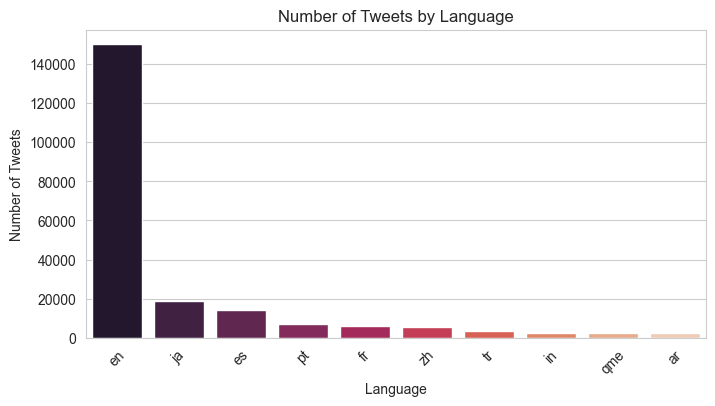

In [40]:
# Count tweets by language
lang_counts = df['lang'].value_counts().head(10)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=lang_counts.index, y=lang_counts.values, palette='rocket')
plt.title('Number of Tweets by Language')
plt.xlabel('Language')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

author_location
United States        60136
日本                    8888
Argentina             5318
India                 3495
Brasil                3233
Hong Kong             3118
France                2905
İstanbul, Türkiye     1771
Earth                 1421
Indonesia             1363
Name: count, dtype: int64


C:\Users\PRUDHVI\AppData\Local\Temp\ipykernel_11048\1003138787.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=lang_counts.values, palette='viridis')
C:\Users\PRUDHVI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PRUDHVI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


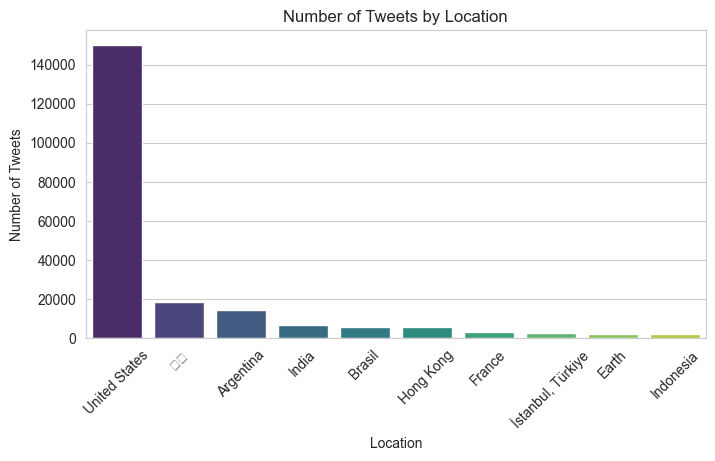

In [41]:
# Count tweets by language
location_counts = df['author_location'].value_counts().head(10)
print(location_counts)
# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=location_counts.index, y=lang_counts.values, palette='viridis')
plt.title('Number of Tweets by Location')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

C:\Users\PRUDHVI\AppData\Local\Temp\ipykernel_11048\2388290328.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_likes_location.index, x=avg_likes_location.values, palette='rocket')


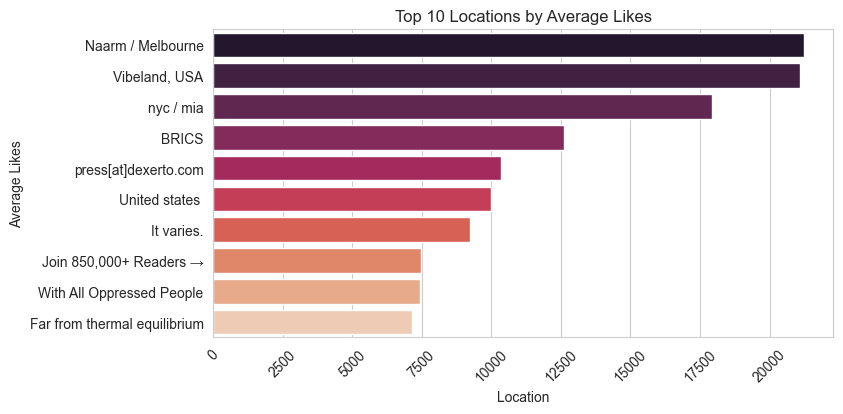

In [42]:
# Group by location and calculate average likes
avg_likes_location = df.groupby('author_location')['likecount'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(y=avg_likes_location.index, x=avg_likes_location.values, palette='rocket')
plt.title('Top 10 Locations by Average Likes')
plt.xlabel('Location')
plt.ylabel('Average Likes')
plt.xticks(rotation=45)
plt.show()

C:\Users\PRUDHVI\AppData\Local\Temp\ipykernel_11048\2177623152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_likes_lang.index, x=avg_likes_lang.values, palette='mako')


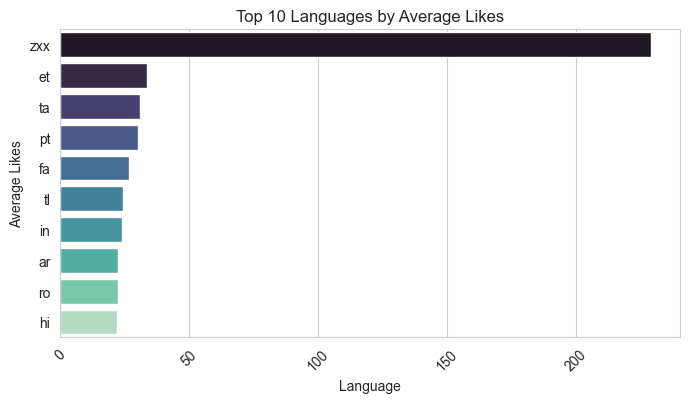

In [43]:
# Group by language and calculate average likes
avg_likes_lang = df.groupby('lang')['likecount'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(y=avg_likes_lang.index, x=avg_likes_lang.values, palette='mako')
plt.title('Top 10 Languages by Average Likes')
plt.xlabel('Language')
plt.ylabel('Average Likes')
plt.xticks(rotation=45)
plt.show()

C:\Users\PRUDHVI\AppData\Local\Temp\ipykernel_11048\1481021651.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=verified_tweets.index, y=verified_tweets.values, ax=ax1, palette='coolwarm', alpha=0.6, label='Tweets')


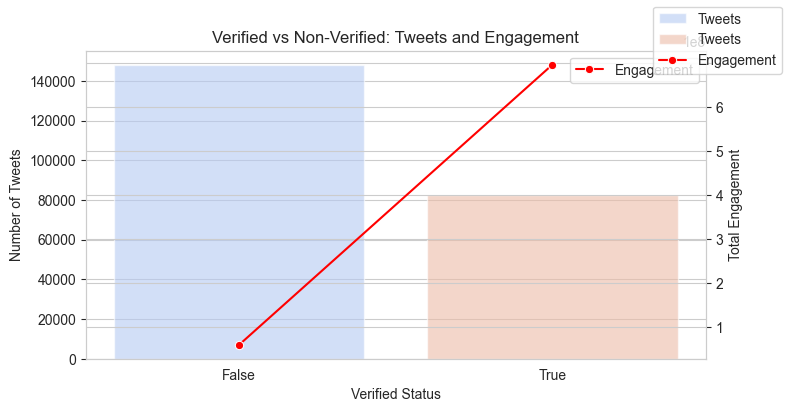

In [44]:
# Group by verified status and calculate total engagement
verified_engagement = df.groupby('author_isblueverified')['total_engagement'].sum()
verified_tweets = df['author_isblueverified'].value_counts()

# Plot
fig, ax1 = plt.subplots(figsize=(8, 4))
sns.barplot(x=verified_tweets.index, y=verified_tweets.values, ax=ax1, palette='coolwarm', alpha=0.6, label='Tweets')
ax2 = ax1.twinx()
sns.lineplot(x=verified_engagement.index, y=verified_engagement.values, ax=ax2, color='red', marker='o', label='Engagement')
ax1.set_xlabel('Verified Status')
ax1.set_ylabel('Number of Tweets')
ax2.set_ylabel('Total Engagement')
plt.title('Verified vs Non-Verified: Tweets and Engagement')
fig.legend(loc='upper right')
plt.show()

C:\Users\PRUDHVI\AppData\Local\Temp\ipykernel_11048\1966278421.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_engagement.index, y=avg_engagement.values, palette='magma')


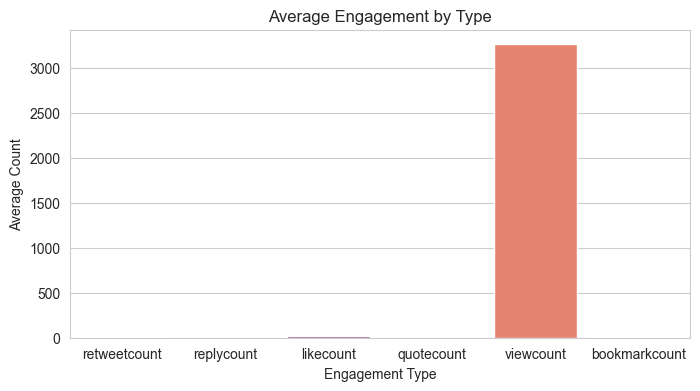

In [45]:
# Calculate average engagement for each column
avg_engagement = df[engagement_columns].mean()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_engagement.index, y=avg_engagement.values, palette='magma')
plt.title('Average Engagement by Type')
plt.xlabel('Engagement Type')
plt.ylabel('Average Count')
plt.show()

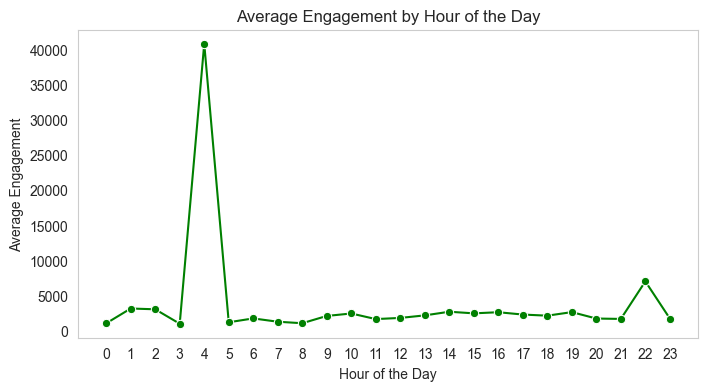

In [46]:
# Extract hour from createdAt
df['hour'] = pd.to_datetime(df['createdat']).dt.hour

# Group by hour and calculate average engagement
hourly_engagement = df.groupby('hour')['total_engagement'].mean()

# Plot
plt.figure(figsize=(8, 4))
sns.lineplot(x=hourly_engagement.index, y=hourly_engagement.values, marker='o', color='green')
plt.title('Average Engagement by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagement')
plt.xticks(range(24))
plt.grid()
plt.show()

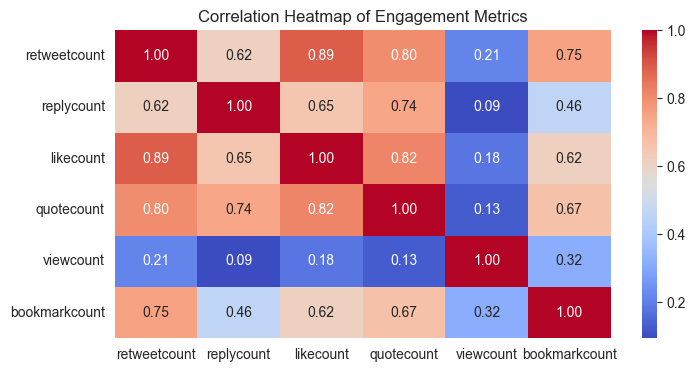

In [47]:
# Calculate correlation matrix
corr_matrix = df[engagement_columns].corr()

# Plot
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Engagement Metrics')
plt.show()

C:\Users\PRUDHVI\AppData\Local\Temp\ipykernel_11048\1697140837.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index.astype(str), y=top_users["likecount"], palette="viridis")


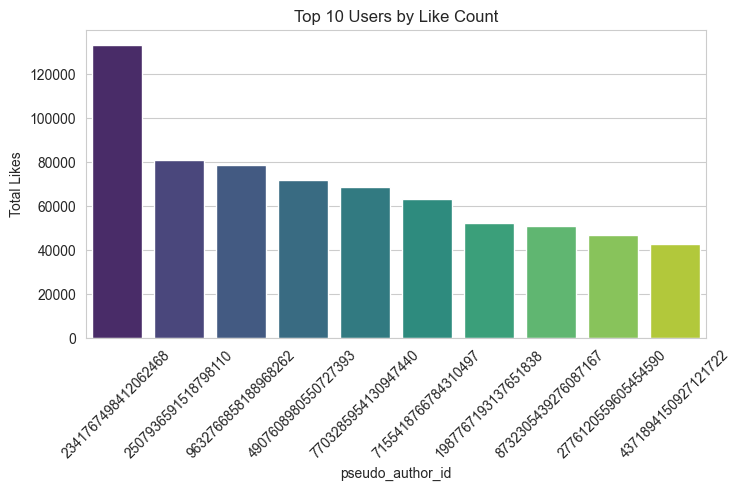

In [48]:
# Identify top users based on engagement metrics
top_users = df.groupby("pseudo_author_id")[engagement_columns].sum().sort_values(by="likecount", ascending=False).head(10)

# Plot top users by like count
plt.figure(figsize=(8, 4))
sns.barplot(x=top_users.index.astype(str), y=top_users["likecount"], palette="viridis")
plt.xlabel("pseudo_author_id")
plt.ylabel("Total Likes")
plt.title("Top 10 Users by Like Count")
plt.xticks(rotation=45)
plt.show()

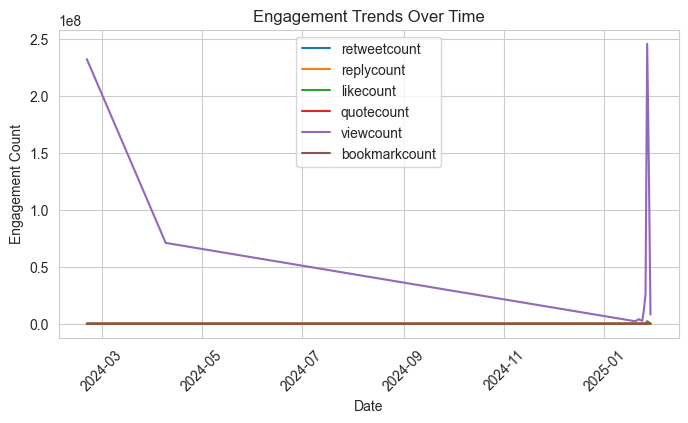

In [49]:
# Extract date from 'createdAt' for time-based analysis
df['tweet_date'] = df['createdat'].dt.date

# Aggregate engagement metrics by date
time_trends = df.groupby("tweet_date")[engagement_columns].sum()

# Plot engagement trends over time
plt.figure(figsize=(8, 4))
for col in engagement_columns:
    sns.lineplot(data=time_trends, x=time_trends.index, y=col, label=col)

plt.xlabel("Date")
plt.ylabel("Engagement Count")
plt.title("Engagement Trends Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.show()

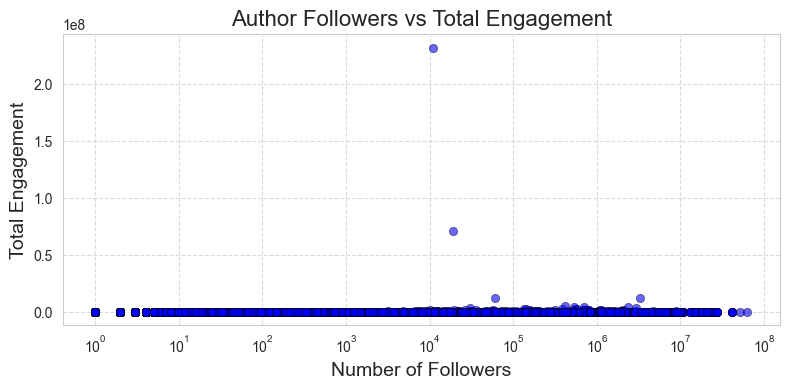

In [51]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['author_followers'], y=df['total_engagement'], alpha=0.6, color='blue', edgecolor='black')

# Add labels and title
plt.title('Author Followers vs Total Engagement', fontsize=16)
plt.xlabel('Number of Followers', fontsize=14)
plt.ylabel('Total Engagement', fontsize=14)

# Use log scale for x-axis (since follower counts can vary widely)
plt.xscale('log')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="author_followers", y="likecount", alpha=0.5, label="Likes")
sns.scatterplot(data=df, x="author_followers", y="retweetcount", alpha=0.5, label="Retweets", color="red")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Author Followers (Log Scale)")
plt.ylabel("Engagement (Log Scale)")
plt.title("Followers vs. Engagement")
plt.legend()
plt.show()

In [50]:
#df.to_csv(r"C:\Users\PRUDHVI\Downloads\archive (2)\dsr.csv", index=False)